# GRIP - THE SPARK FOUNDATION
## DATA SCIENCE AND BUISNESS ANALYTICS INTERNSHIP

## Linear Regression with Python Scikit Learn - Prediction using Supervised ML

# Arvind Jaiswal


## Task-1: Predict the percentage of an student based on the no. of study hours

### In this regression task we will predict the percentage of marks that a student is expected to score based on the number of hours the studied. this is a simple linear regression task as it involves just two variables. 

## Import the required Libraries

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

## Reading The Data from data source

In [116]:
student = pd.read_csv("study_spark.csv")

### data Imported sucessfully

In [117]:
student.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [118]:
student.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [119]:
student.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [120]:
student.shape

(25, 2)

In [121]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### checking the missing values

In [122]:
student.isnull().sum()

Hours     0
Scores    0
dtype: int64

### Checking the correlation between hours and study

In [123]:
student.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## Data Visualization

## Visualization with line plot

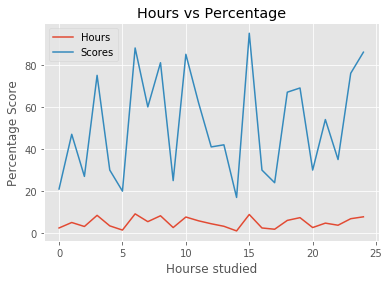

In [124]:
plt.style.use('ggplot')
student.plot(kind='line')
plt.title('Hours vs Percentage')
plt.xlabel('Hourse studied')
plt.ylabel('Percentage Score')
plt.show()

## Data Visualisation with area plot

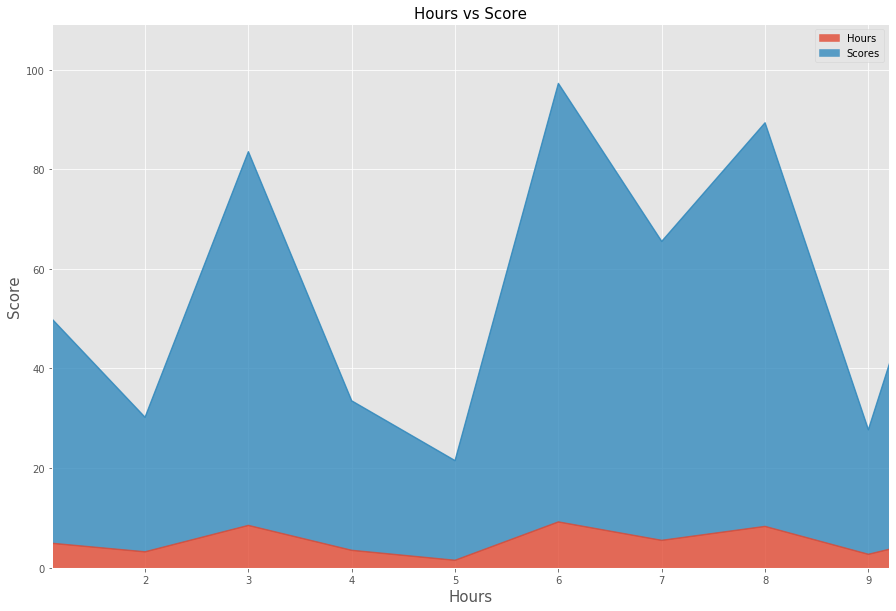

In [125]:
xmin = min(student.Hours)
xmax = max(student.Hours)
student.plot(kind='area',alpha=0.8,stacked=True,figsize=(15,10),xlim=(xmin,xmax))
plt.title('Hours vs Score',size=15)
plt.xlabel('Hours',size=15)
plt.ylabel('Score',size=15)
plt.show()

## Data visualizing with scatter plot

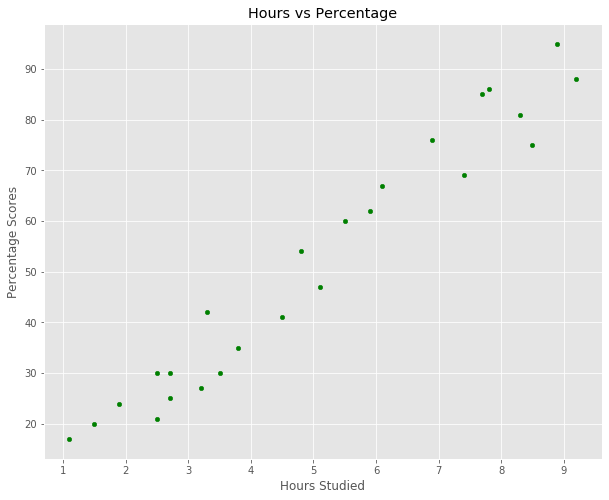

In [126]:
student.plot(kind='scatter',x='Hours',y='Scores',color='g',figsize=(10,8))
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scores')
plt.show()

### By Visulization we come to know that this problem can be easily solved by linear regression

## Modeling the data

In [127]:
x = np.asanyarray(student[['Hours']])
y = np.asanyarray(student[['Scores']])

# Using train test split to split the data in train and test Data
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=2)
regressor = LinearRegression()
regressor.fit(train_x,train_y)

print("Training Complete\n")
print('coehhicient: ', regressor.coef_)
print('Intercept: ',regressor.intercept_)

Training Complete

coehhicient:  [[9.94061514]]
Intercept:  [1.50791048]


## we can also plot the fit line over the data in single linear regression 

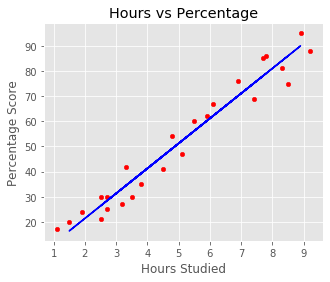

In [128]:
student.plot(kind='scatter',x='Hours',y='Scores',figsize=(5,4),color='r')
plt.plot(train_x, regressor.coef_[0]*train_x + regressor.intercept_,color='b')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

### The blue line is the best fit line for this data

## Evaluation of model

In [129]:
# Using metrics to find mean obsolute error and r2 to see the accuracy

from sklearn import metrics
from sklearn.metrics import r2_score

y_pred=regressor.predict(test_x)
print('Mean Absolute Error : {}'.format(metrics.mean_absolute_error(y_pred,test_y)))
print("R2-score: %.2f" % r2_score(y_pred, test_y))


Mean Absolute Error : 4.877039354964476
R2-score: 0.98


### Mean absolute Error: it is mean of absolute value of error r2-score: it is not the error but its the metric for accuracy for the model. Higher the r2 value higher is the accuracy of model. Best score is 1

In [130]:
# Comparing Actual vs predicted
#student2 = pd.DataFrame({'Actual': test_y, 'Predicted': y_pred})
#student2

## Predicting the score with the single input value

In [131]:
hours = 9.25
predicted_score = regressor.predict([[hours]])
print(f'No. of hours = {hours}')
print(f'predicted Score  = {predicted_score[0]}')


No. of hours = 9.25
predicted Score  = [93.45860056]
